# City of Boston Budget Analysis

https://github.com/Ryan-J-Gilbert/CS506-final-proj-budget

## Data Collection

 We will start with the FY25 Adopted Operating Budget found at the following link: https://data.boston.gov/dataset/operating-budget/resource/8f2971f0-7a0d-401d-8376-0289e3b810ba

| Data Field           | Description                                                                                             |
|----------------------|---------------------------------------------------------------------------------------------------------|
| **Cabinet**          | Cabinet associated with department                                                                      |
| **Dept**             | City department or agency                                                                               |
| **Program**          | Subordinate unit in City Dept or Agency                                                                 |
| **Expense Category** | Category of expenses such as personnel, contracted services, supplies, current charges, equipment, other. |
| **FY22 Actual Expense** | Actual expenses three years prior to most current budget                                                |
| **FY23 Actual Expense** | Actual expenses two years prior to most current budget                                                  |
| **FY24 Appropriation**  | Budget for year prior to current budget                                                                 |
| **FY25 Budget**         | Current budget either recommended or adopted                                                           |

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

budget_df = pd.read_csv('data/fy25-adopted-operating-budget.csv')
budget_df.head()

,Cabinet,Dept,Program,Expense Category,FY22 Actual Expense,FY23 Actual Expense,FY24 Appropriation,FY25 Budget
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1624903.69,2374448.36,1921403.81,2217748.39
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,284597.9,383743.11,219633.42,234628
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,28541.55,74491.63,55573.65,60000
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,19410.3,25350.83,16734.29,20000
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,16164.36,44132.61,36115,53000


In [39]:
print(budget_df.isna().sum())
budget_df.info()

Cabinet                0
Dept                   0
Program                0
Expense Category       0
FY22 Actual Expense    0
FY23 Actual Expense    0
FY24 Appropriation     0
FY25 Budget            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Cabinet              943 non-null    object
 1   Dept                 943 non-null    object
 2   Program              943 non-null    object
 3   Expense Category     943 non-null    object
 4   FY22 Actual Expense  943 non-null    object
 5   FY23 Actual Expense  943 non-null    object
 6   FY24 Appropriation   943 non-null    object
 7   FY25 Budget          943 non-null    object
dtypes: object(8)
memory usage: 59.1+ KB


In [40]:
# replace #Missing with NaN
budget_df = budget_df.replace('#Missing', np.nan)

In [41]:
# convert expense columns to floats
budget_df['FY22 Actual Expense'] = budget_df['FY22 Actual Expense'].astype(float)
budget_df['FY23 Actual Expense'] = budget_df['FY23 Actual Expense'].astype(float)
budget_df['FY24 Appropriation'] = budget_df['FY24 Appropriation'].astype(float)
budget_df['FY25 Budget'] = budget_df['FY25 Budget'].astype(float)

In [42]:
# unique values for Cabinet, Dept, Program, Expense Category
print('Cabinet unique values:')
print(budget_df['Cabinet'].unique())
print('\nDept unique values:')
print(budget_df['Dept'].unique())
print('\nProgram unique values:')
print(budget_df['Program'].unique())
print('\nExpense Category unique values:')
print(budget_df['Expense Category'].unique())


Cabinet unique values:
["Mayor's Cabinet" 'Equity & Inclusion Cabinet' 'OPAT Cabinet'
 'Operations Cabinet' 'Community Engagement Cabinet'
 'Arts & Culture Cabinet' 'Economic Opportunity & Inclusion Cabinet'
 'Worker Empowerment Cabinet' 'Education Cabinet'
 'Environment, Energy & Open Space Cabinet' 'Finance Cabinet'
 'People Operations Cabinet' 'Human Services Cabinet'
 'Public Health Cabinet' 'Housing Cabinet'
 'Information & Technology Cabinet' 'Public Safety Cabinet'
 'Streets Cabinet' 'Planning Cabinet' 'Non-Mayoral Departments' 'Other']

Dept unique values:
["Mayor's Office" 'Election Division' 'Listing Board'
 'Intergovernmental Relations' 'Law Department' 'Office of Equity'
 'Office of Diversity' 'Office of Resiliency & Racial Equity'
 'Office of Language & Communications Access' 'Human Right Commission'
 'Office for Immigrant Advancement' "Women's Advancement"
 'Black Male Advancement' 'Fair Housing & Equity' 'LGBTQ+ Advancement'
 'Commission For Persons W/Disabilities'
 'Off

In [43]:
# Summing expenses by department for each fiscal year
dept_spending = budget_df.groupby('Dept')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
dept_spending = dept_spending.sort_values('FY25 Budget', ascending=False)
print(dept_spending)

                                      FY22 Actual Expense  \
Dept                                                        
Boston Public Schools                        1.294706e+09   
Police Department                            4.204116e+08   
Pensions                                     3.236842e+08   
Fire Department                              2.895138e+08   
Charter School Tuition                       2.298422e+08   
...                                                   ...   
Human Right Commission                       3.702503e+05   
Unemployment Compensation                    1.901616e+05   
Reserve                                      2.250274e+06   
Office of Diversity                          2.542203e+05   
Office of Resiliency & Racial Equity         1.740456e+06   

                                      FY23 Actual Expense  FY24 Appropriation  \
Dept                                                                            
Boston Public Schools                       

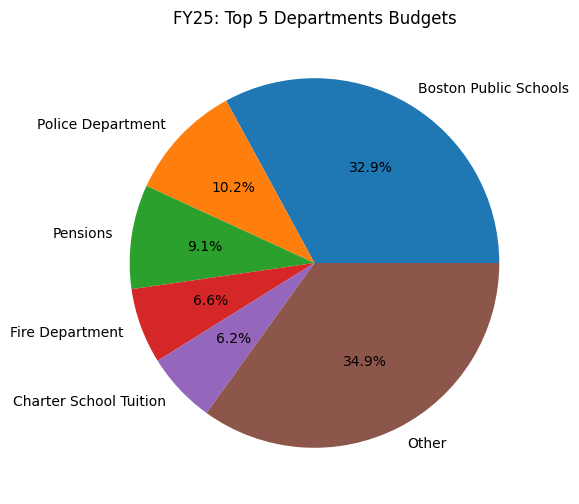

In [78]:
# pie chart of top n departments by budget, other for rest
n = 5
top_n = dept_spending.head(n)
other = dept_spending.iloc[n:].sum()
top_n.loc['Other'] = other
plt.figure(figsize=(6, 6))
top_n['FY25 Budget'].plot.pie(y='FY25 Budget', autopct='%1.1f%%', legend=False)
plt.axis('off')
plt.title(f'FY25: Top {n} Departments Budgets')
plt.show()

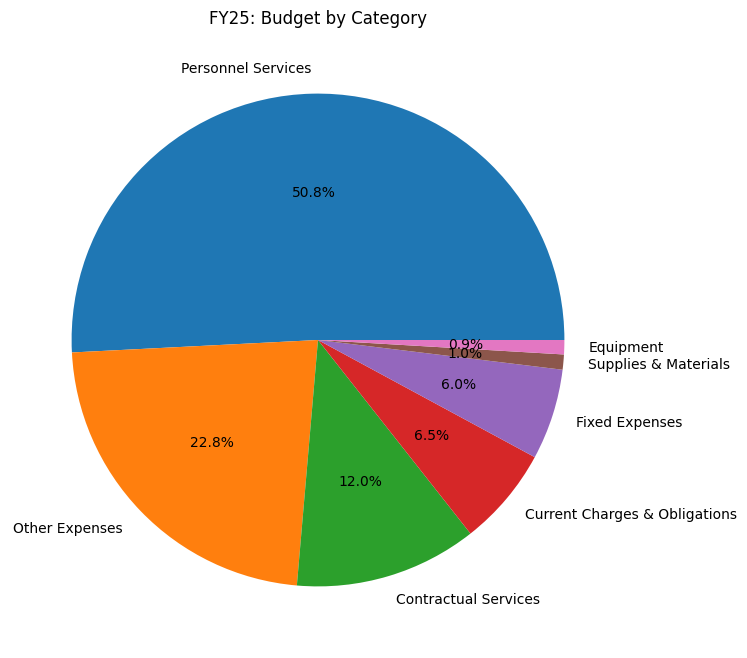

In [69]:
# pie chart for budget categories
category_spending = budget_df.groupby('Expense Category')['FY25 Budget'].sum()
category_spending = category_spending.sort_values(ascending=False)
plt.figure(figsize=(8, 8))
category_spending.plot.pie(y='FY25 Budget', autopct='%1.1f%%', legend=False)
plt.axis('off')
plt.title('FY25: Budget by Category')
plt.show()

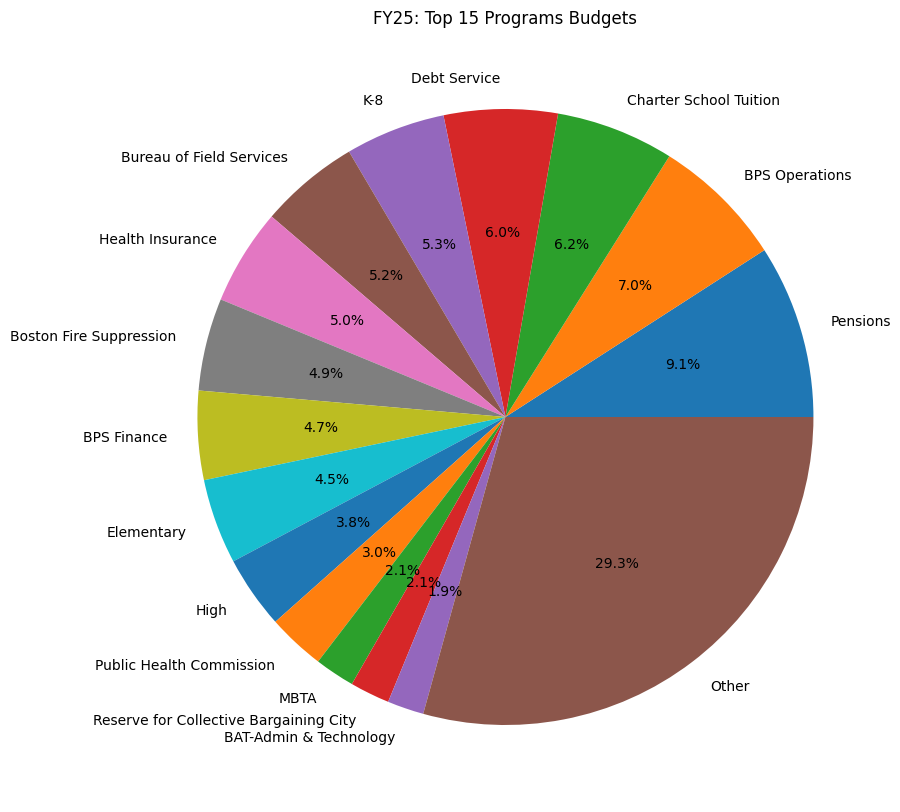

In [99]:
# pie chart for budget by program for top n programs
n2 = 15
program_spending = budget_df.groupby('Program')['FY25 Budget'].sum()
program_spending = program_spending.sort_values(ascending=False)
top_n_program = program_spending.head(n2)
other = program_spending.iloc[n2:].sum()
top_n_program.loc['Other'] = other
plt.figure(figsize=(10, 10))
top_n_program.plot.pie(autopct='%1.1f%%', legend=False)
plt.axis('off')
plt.title(f'FY25: Top {n2} Programs Budgets')
plt.show()

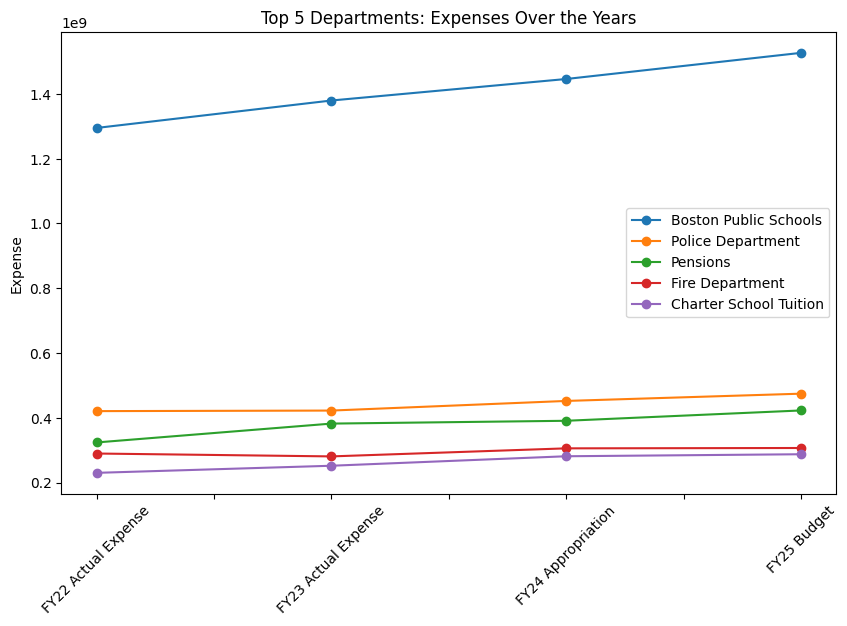

In [82]:
# plot expenses over the years for top n departments
# as a line plot
plt.figure(figsize=(10, 6))
for dept in dept_spending.head(n).index:
    dept_data = budget_df[budget_df['Dept'] == dept]
    dept_data = dept_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    dept_data.plot(marker='o', label=dept)
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title(f'Top {n} Departments: Expenses Over the Years')

plt.legend()
plt.show()

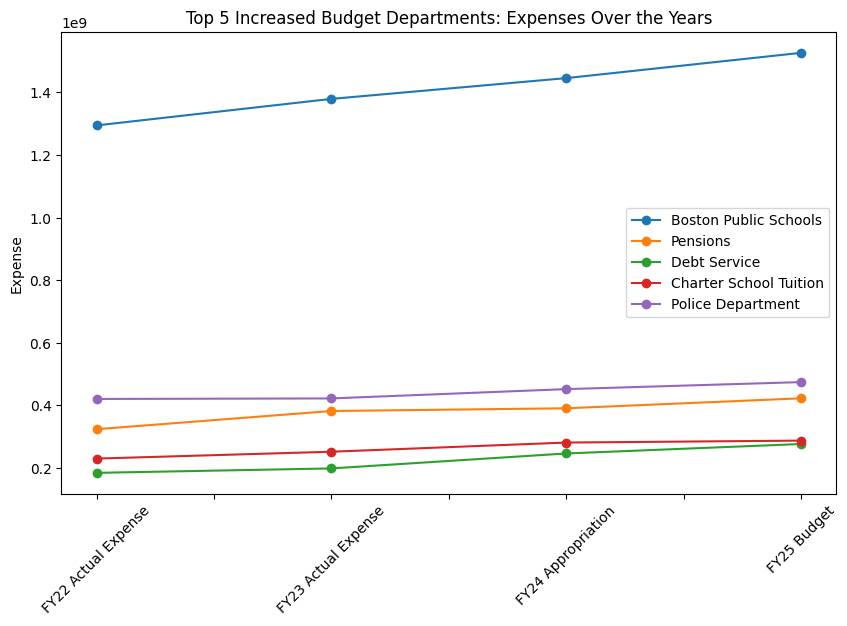

In [103]:
# plot department expenses over the years as a line chart
# for departments with the highest increase in budget
dept_spending['Increase'] = dept_spending['FY25 Budget'] - dept_spending['FY22 Actual Expense']
dept_spending = dept_spending.sort_values('Increase', ascending=False)
plt.figure(figsize=(10, 6))
for dept in dept_spending.head(n).index:
    dept_data = budget_df[budget_df['Dept'] == dept]
    dept_data = dept_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    dept_data.plot(marker='o', label=dept)
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title(f'Top {n} Increased Budget Departments: Expenses Over the Years')

plt.legend()
plt.show()

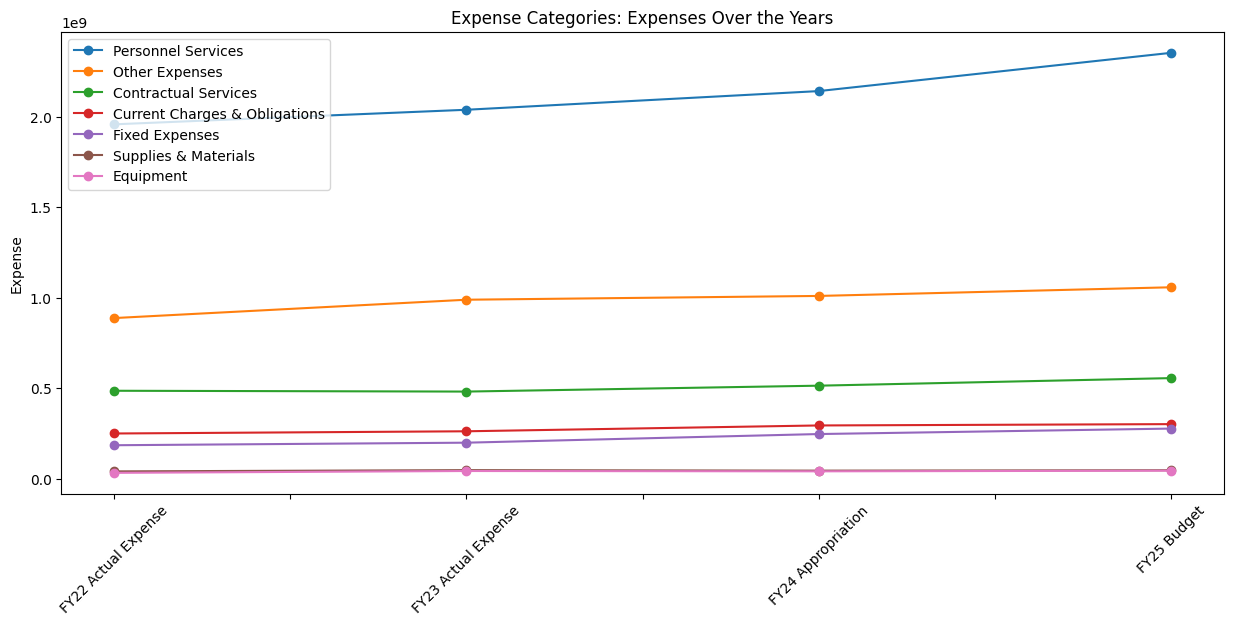

In [92]:
# plot expenses over the years for categories
# as a line plot
plt.figure(figsize=(15, 6))
for category in category_spending.index:
    category_data = budget_df[budget_df['Expense Category'] == category]
    category_data = category_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    category_data.plot(marker='o', label=category)
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title('Expense Categories: Expenses Over the Years')

plt.legend(loc='upper left')
plt.show()

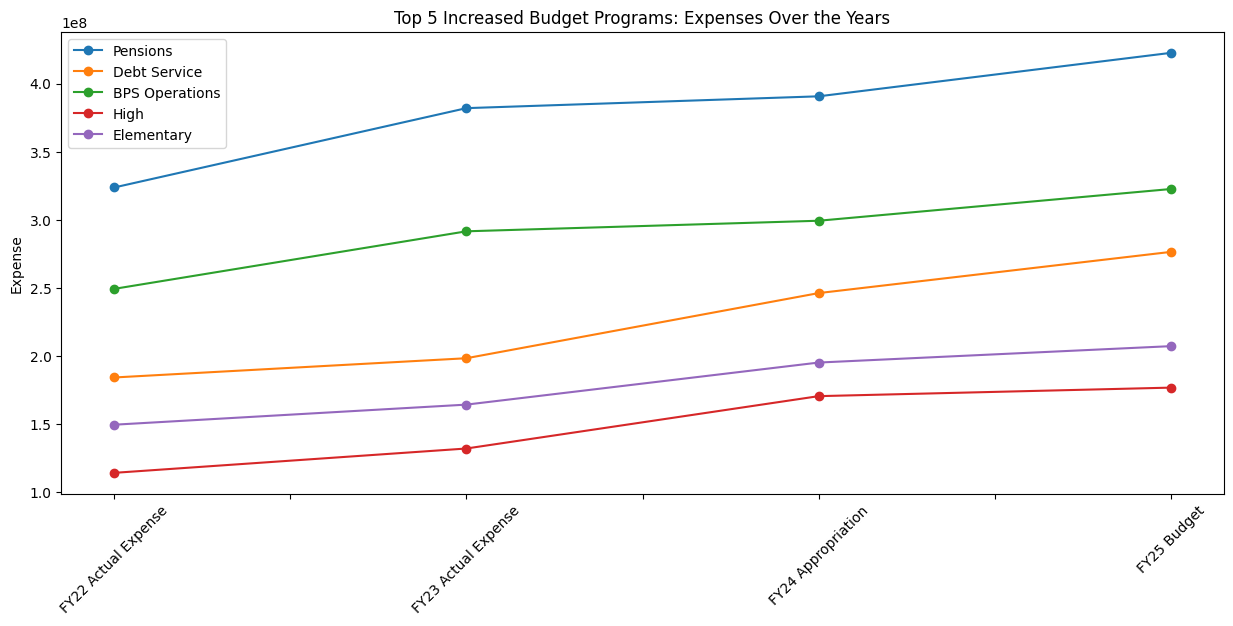

In [106]:
# plot program expenses over the years as a line chart
# for programs with the highest increase in budget
program_spending = budget_df.groupby('Program')[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
program_spending['Increase'] = program_spending['FY25 Budget'] - program_spending['FY22 Actual Expense']
program_spending = program_spending.sort_values('Increase', ascending=False)
plt.figure(figsize=(15, 6))
for program in program_spending.head(n).index:
    program_data = budget_df[budget_df['Program'] == program]
    program_data = program_data[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()
    program_data.plot(marker='o', label=program)
plt.xticks(rotation=45)
plt.ylabel('Expense')
plt.title(f'Top {n} Increased Budget Programs: Expenses Over the Years')

plt.legend(loc='upper left')
plt.show()

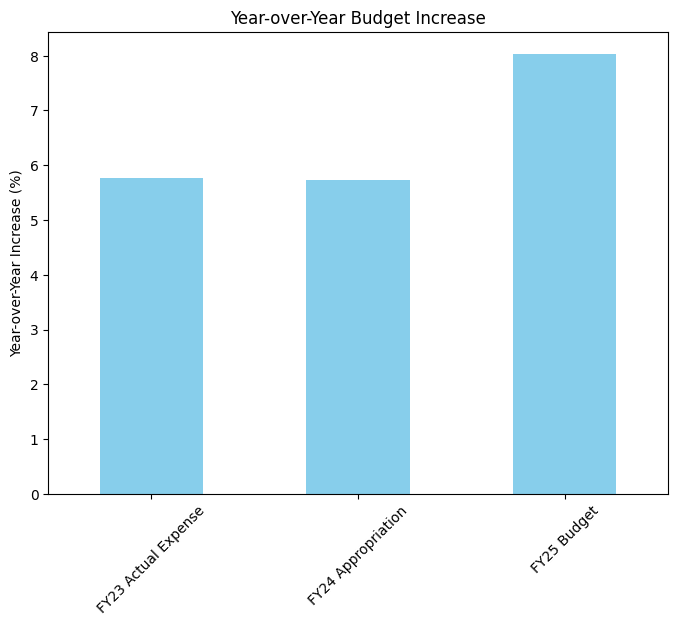

In [119]:
# overall budget change over the years
# Sum budget expenses for each year to get the total budget per year
budget_increase = budget_df[['FY22 Actual Expense', 'FY23 Actual Expense', 'FY24 Appropriation', 'FY25 Budget']].sum()

# Calculate year-over-year percentage changes
budget_change_yoy = budget_increase.pct_change() * 100

# Remove the first entry as it will be NaN (no previous year for FY22)
budget_change_yoy = budget_change_yoy.dropna()

# Plotting the year-over-year changes
plt.figure(figsize=(8, 6))
budget_change_yoy.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Year-over-Year Increase (%)')
plt.title('Year-over-Year Budget Increase')
plt.show()